# Introduction
1. [Load and Check Data](#1)
1. [Variable Description](#2)
1. [Basic Data Analysis](#3)
1. [Outlier Detection](#4)
1. [Find Missing Value](#5)
1. [Fill Missing Value](#6)
1.  [Visualization](#7)
1. [Feature Engineering](#8)
1. [Modeling](#9)
     * [Train Test Split](#10)
     * [Hyperparameter Tuning -- Randomized Search -- Cross Validation](#11)
     * [Ensemble Modeling](#12)
1. [Prediction and Submission](#13)


In [102]:
#importing
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.preprocessing import LabelEncoder
filterwarnings('ignore')
import seaborn as sns
from collections import Counter

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


## Variable Description :
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

<a id = "1"></a><br>
# Load and Check Data

In [103]:
train_data=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_data=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
test_passengerıd=test_data["PassengerId"]
train_data_len = len(train_data)
all_data = pd.concat([train_data,test_data],axis = 0).reset_index(drop = True)

In [104]:
#drop PassengerId and Name
all_data=all_data.drop(["PassengerId","Name"],axis=1)



In [105]:
all_data.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
6,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
7,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,True
8,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True
9,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True


In [106]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    12682 non-null  object 
 1   CryoSleep     12660 non-null  object 
 2   Cabin         12671 non-null  object 
 3   Destination   12696 non-null  object 
 4   Age           12700 non-null  float64
 5   VIP           12674 non-null  object 
 6   RoomService   12707 non-null  float64
 7   FoodCourt     12681 non-null  float64
 8   ShoppingMall  12664 non-null  float64
 9   Spa           12686 non-null  float64
 10  VRDeck        12702 non-null  float64
 11  Transported   8693 non-null   object 
dtypes: float64(6), object(6)
memory usage: 1.2+ MB


* float64(6): Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
* bool(1): Transported
* object(6):HomePlanet,CryoSleep,Cabin,Destination,VIP,Name

In [107]:
all_data.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [108]:
all_data["Cabin"].value_counts() #değerlendir!!!

G/734/S     8
G/160/P     8
D/176/S     7
G/1476/S    7
B/201/P     7
           ..
E/317/P     1
F/1039/P    1
F/1038/P    1
C/158/P     1
G/1498/S    1
Name: Cabin, Length: 9825, dtype: int64

In [109]:
all_data.isnull().sum()

HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
dtype: int64

In [110]:
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,12700.0,28.771969,14.387261,0.0,19.0,27.0,38.0,79.0
RoomService,12707.0,222.897852,647.596664,0.0,0.0,0.0,49.0,14327.0
FoodCourt,12681.0,451.961675,1584.370747,0.0,0.0,0.0,77.0,29813.0
ShoppingMall,12664.0,174.906033,590.558690,0.0,0.0,0.0,29.0,23492.0
Spa,12686.0,308.476904,1130.279641,0.0,0.0,0.0,57.0,22408.0
VRDeck,12702.0,306.789482,1180.097223,0.0,0.0,0.0,42.0,24133.0


<a id = "2"></a><br>
## Variable Description


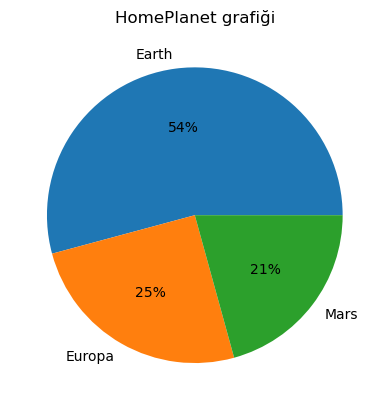

['Earth', 'Europa', 'Mars']: 
 Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


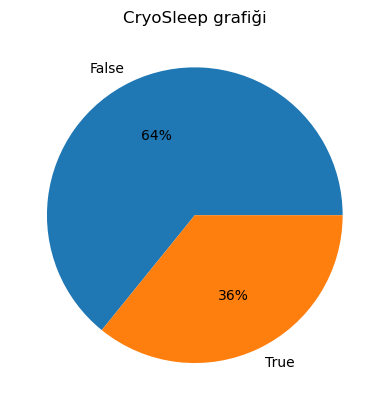

[False, True]: 
 False    5439
True     3037
Name: CryoSleep, dtype: int64


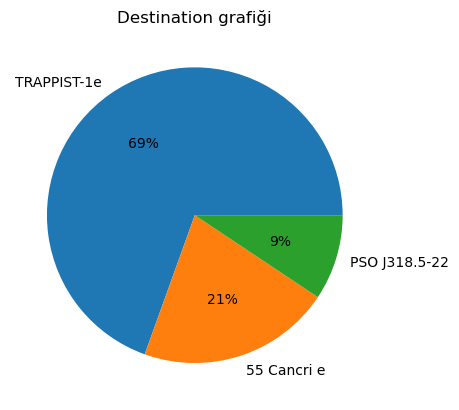

['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22']: 
 TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


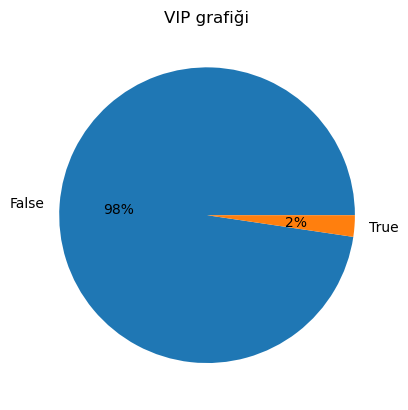

[False, True]: 
 False    8291
True      199
Name: VIP, dtype: int64


In [111]:

def pie_plot(kolon): #We created a function to customize the pie chart
    
    labels = list(train_data[kolon].value_counts().index)
    plt.pie(train_data[kolon].value_counts(),labels = labels, 
           autopct = "%1.f%%")
    plt.title(kolon + " grafiği")
    plt.show()
    print("{}: \n {}".format(labels,train_data[kolon].value_counts()))

kategorik = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for column in kategorik: #We used for loop to print all categorical variables

    pie_plot(column)

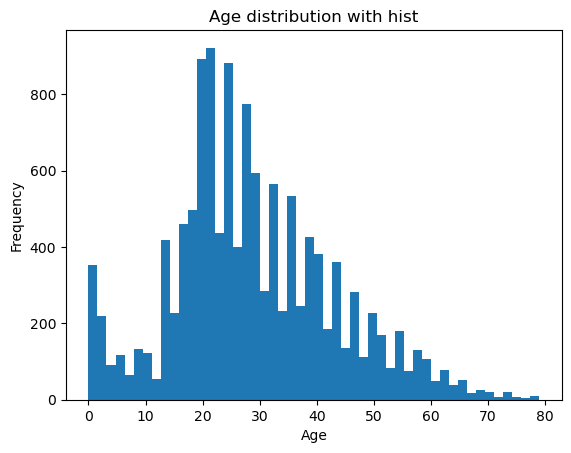

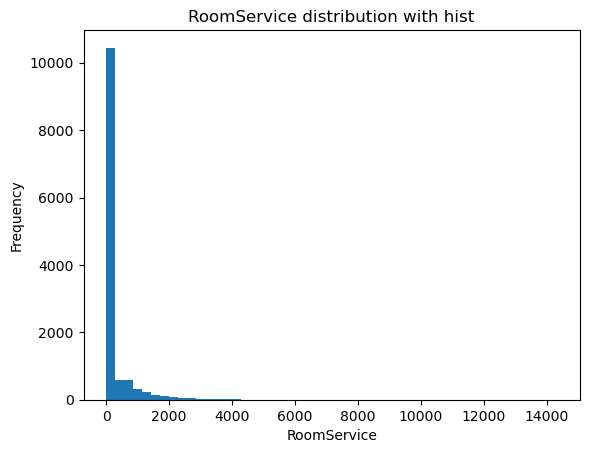

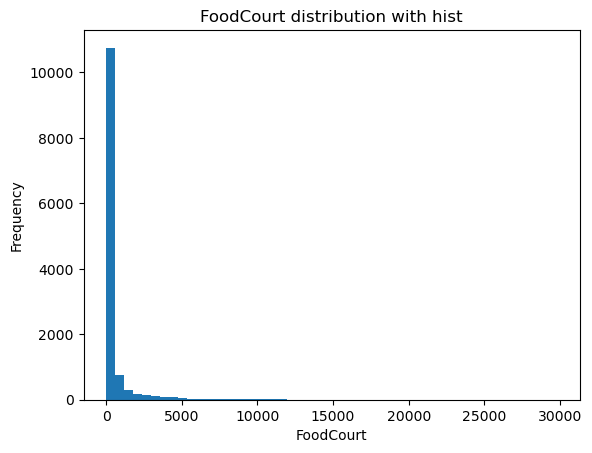

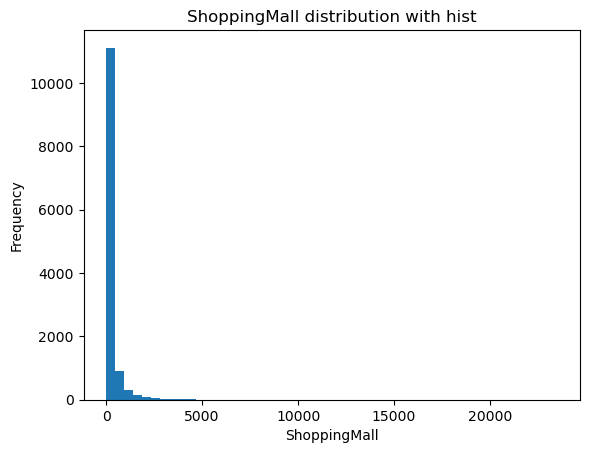

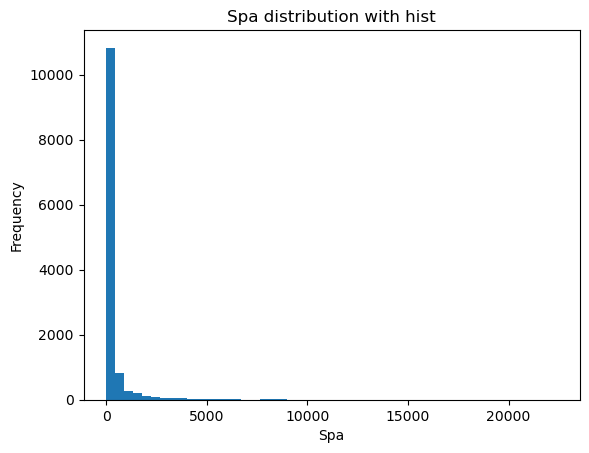

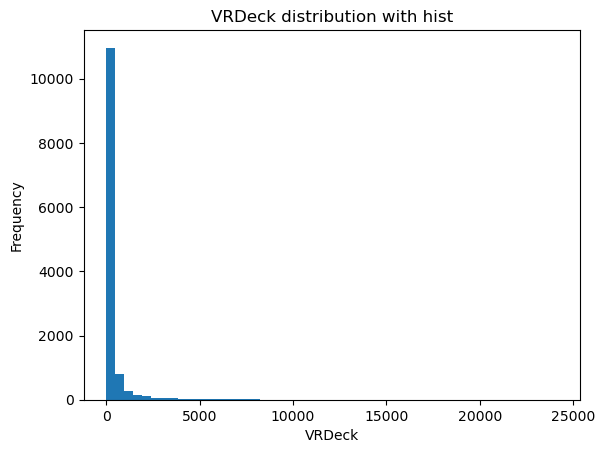

In [112]:
# visualization of numeric variables
category=["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

for i in category:
    plt.hist(all_data[i], bins = 50)
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(i))
    plt.show()


* Age,RoomService,FoodCourt,ShoppingMall,Spa and VRDeck variables in the future we will combine it into one variable.

<a id = "3"></a><br>
## Basic Data Analysis

In [113]:
all_data[["HomePlanet","Transported"]].groupby(["HomePlanet"], as_index = False).mean().sort_values(by="Transported",ascending = False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.423946


In [114]:
all_data[["CryoSleep","Transported"]].groupby(["CryoSleep"], as_index = False).mean().sort_values(by="Transported",ascending = False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.328921


In [115]:
all_data[["Destination","Transported"]].groupby(["Destination"], as_index = False).mean().sort_values(by="Transported",ascending = False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


In [116]:
all_data[["VIP","Transported"]].groupby(["VIP"], as_index = False).mean().sort_values(by="Transported",ascending = False)

,VIP,Transported
0,False,0.506332
1,True,0.381910


<a id = "4"></a><br>
## Outlier Detection

In [117]:

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
    
    return multiple_outliers

<a id = "5"></a><br>
## Find Missing Value

In [118]:
all_data.columns[all_data.isnull().any()]

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [119]:
all_data.isnull().sum()

HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Transported     4277
dtype: int64

<a id = "6"></a><br>
## Fill Missing Value

In [120]:
all_data['CryoSleep'].fillna(all_data['CryoSleep'].mode()[0],inplace=True)
all_data['VIP'].fillna(all_data['VIP'].mode()[0],inplace=True)
all_data['RoomService'].fillna(all_data['RoomService'].mean(),inplace=True)
all_data['FoodCourt'].fillna(all_data['FoodCourt'].mean(),inplace=True)
all_data['ShoppingMall'].fillna(all_data['ShoppingMall'].mean(),inplace=True)
all_data['Spa'].fillna(all_data['Spa'].mean(),inplace=True)
all_data['VRDeck'].fillna(all_data['VRDeck'].mean(),inplace=True)
all_data['Age'].fillna(all_data['Age'].median(),inplace=True)
all_data['HomePlanet'].fillna(all_data['HomePlanet'].mode()[0],inplace=True)
all_data['Destination'].fillna(all_data['Destination'].mode()[0],inplace=True)
all_data['Cabin'] =all_data['Cabin'].fillna('T/0/P')


In [121]:
all_data.isnull().sum()

HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Transported     4277
dtype: int64

In [122]:
all_data['total_spent']= all_data['RoomService']+ all_data['FoodCourt']+ all_data['ShoppingMall']+ all_data['Spa']+ all_data['VRDeck']
all_data[['Deck','Num','Side']] = all_data.Cabin.str.split('/',expand=True)

In [123]:
all_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_spent,Deck,Num,Side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,F,1,S


<a id = "7"></a><br>
## Visualization

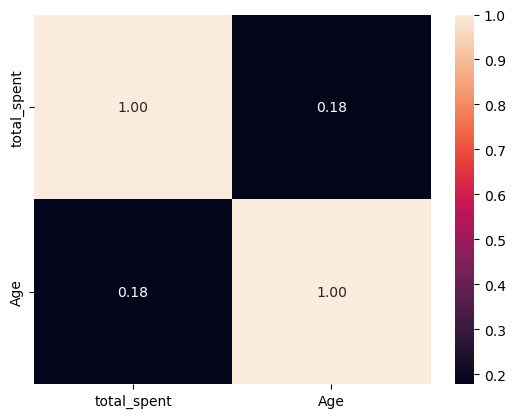

In [124]:
list1 = ["total_spent", "Age", "Transported"]
sns.heatmap(all_data[list1].corr(), annot = True, fmt = ".2f")
plt.show()

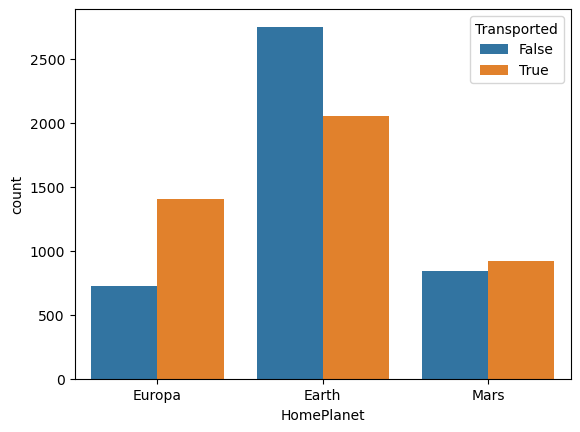

In [125]:
#HomePlanet--Transported
sns.countplot(x="HomePlanet",hue="Transported", data=all_data);


* The majority of passengers on the ship, whose home planet is the earth, and most of them have not Transported.

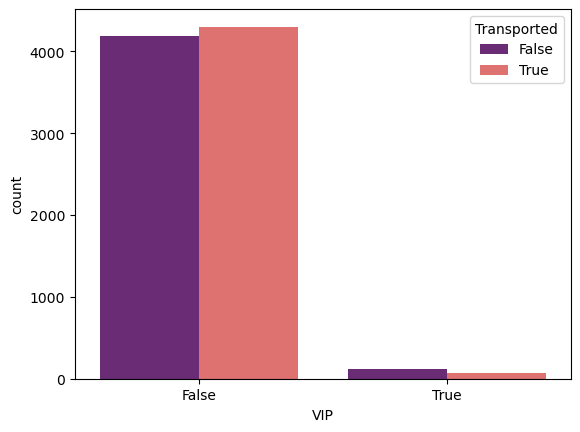

In [126]:
#Vıp--Transported relationship
sns.countplot(x=all_data["VIP"],hue=all_data["Transported"],palette="magma");

* Most of the passengers are not VIP in ship.


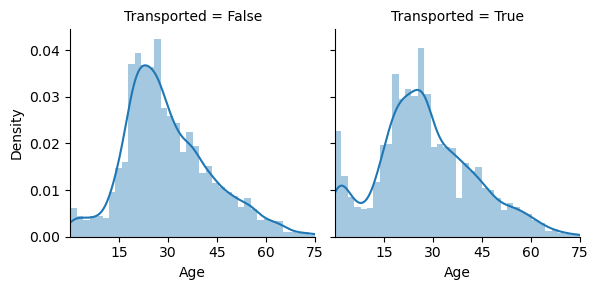

In [127]:
#Age--Transported 
a=sns.FacetGrid(all_data, col = "Transported").map(sns.distplot, "Age", bins =40)
a.set(xlim=(0, 75), xticks=[15, 30,45,60,75])
plt.show()

* Mostly there are passengers between 20 and 30 years old.

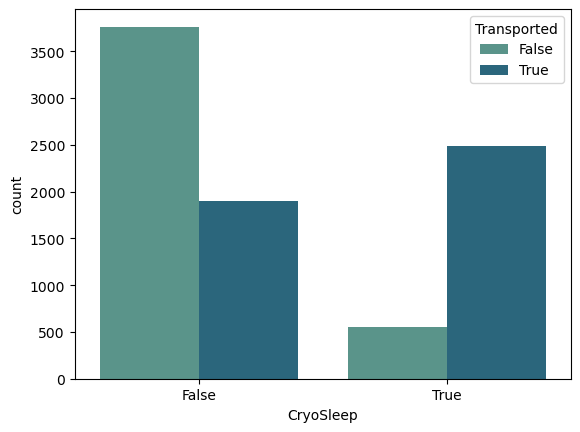

In [128]:
#CryoSleep-- Transported 
sns.countplot(x=all_data["CryoSleep"],hue=all_data["Transported"],palette="crest");

* Most of passengers they refused to sleep during the journey.

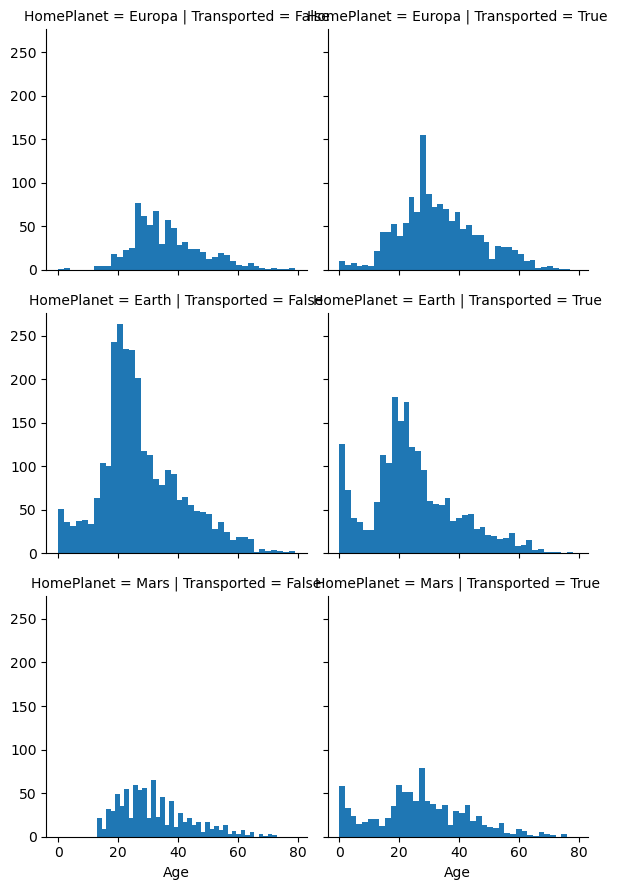

In [129]:
#HomePlanet--Age--Transported
g = sns.FacetGrid(all_data, col = "Transported", row = "HomePlanet")
g.map(plt.hist, "Age", bins = 40)
g.add_legend()
plt.show()

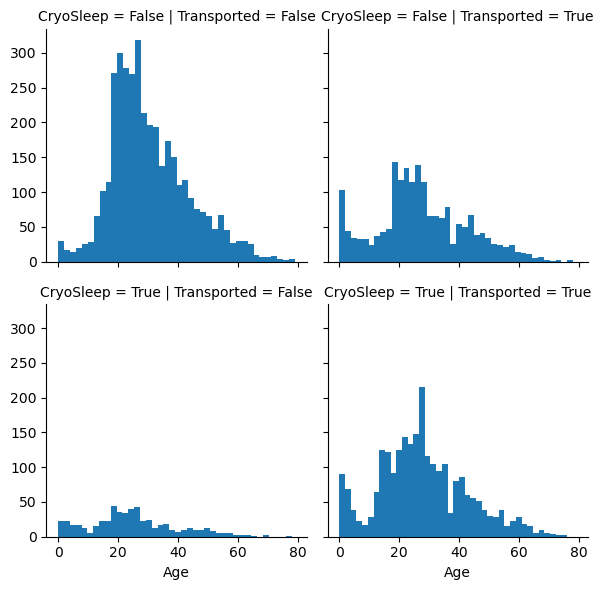

In [130]:
#CryoSleep--Age--Transported
a = sns.FacetGrid(all_data, col = "Transported", row = "CryoSleep")
a.map(plt.hist, "Age", bins = 40)
a.add_legend()
plt.show()

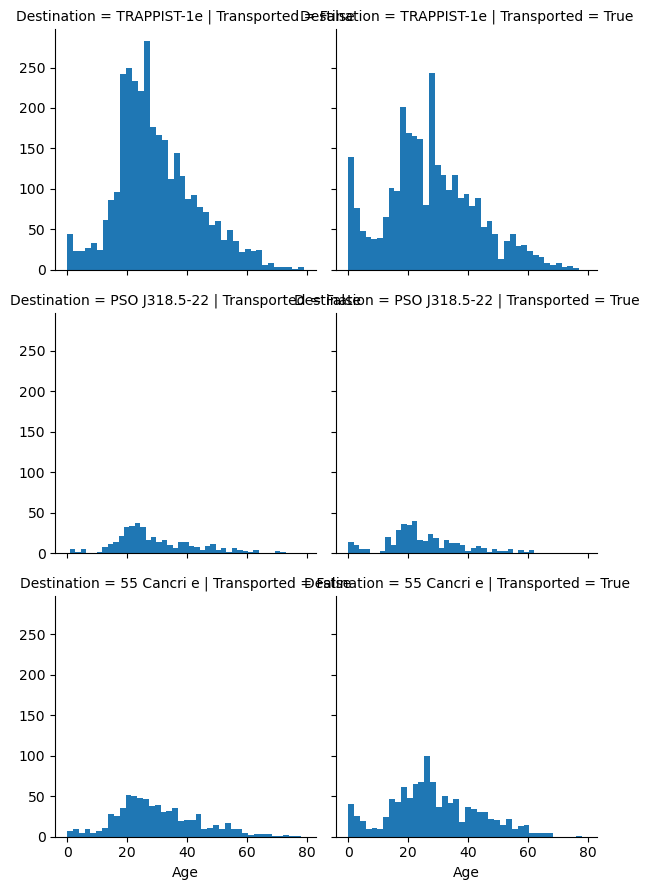

In [131]:
#Destination--Age--Transported
a = sns.FacetGrid(all_data, col = "Transported", row = "Destination")
a.map(plt.hist, "Age", bins = 40)
a.add_legend()
plt.show()

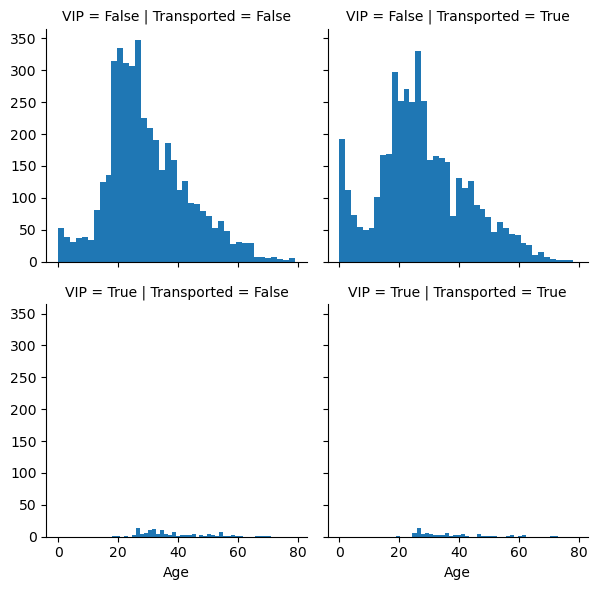

In [132]:
#VIP--Age--Transported
a = sns.FacetGrid(all_data, col = "Transported", row = "VIP")
a.map(plt.hist, "Age", bins = 40)
a.add_legend()
plt.show()


In [133]:
#HomePlanet--CryoSleep--Transported Relationship
pd.crosstab([all_data.CryoSleep, all_data.Transported], all_data.HomePlanet,margins=True).style.background_gradient()

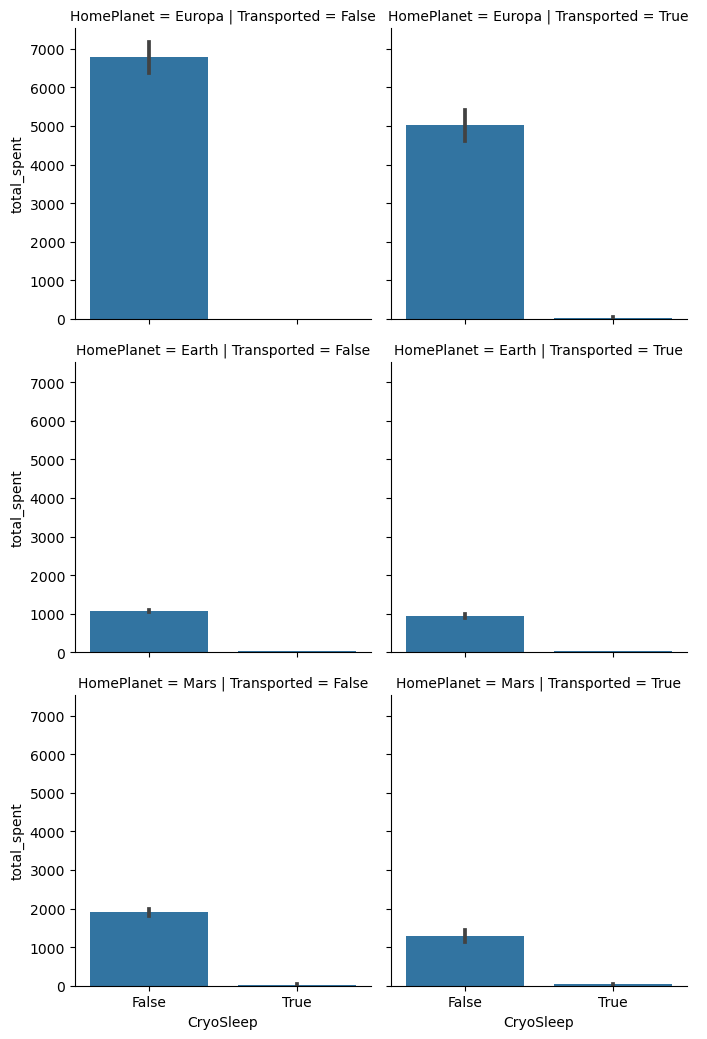

In [134]:
#HomePlanet-- CryoSleep--total_sleep--Transported
g = sns.FacetGrid(all_data, row = "HomePlanet", col = "Transported",height=3.5)
g.map(sns.barplot, "CryoSleep", "total_spent")
g.add_legend()
plt.show()

<a id = "8"></a><br>
## Feature Engineering

In [135]:
list=["HomePlanet","Destination",]
for i in list:
    all_data = pd.get_dummies(all_data, columns=[i],drop_first=True)

In [136]:
all_data.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_spent,Deck,Num,Side,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,B,0,P,1,0,0,1
1,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,F,0,S,0,0,0,1
2,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,A,0,S,1,0,0,1
3,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,A,0,S,1,0,0,1
4,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,F,1,S,0,0,0,1


In [137]:
for col in all_data.columns[all_data.dtypes == object]:
    if col != 'Transported':
        le = LabelEncoder()
        all_data[col] = le.fit_transform(all_data[col])
        
all_data['CryoSleep'] = all_data['CryoSleep'].astype('int')
all_data['VIP'] = all_data['VIP'].astype('int')

In [138]:
all_data.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_spent,Deck,Num,Side,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,208,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0.0,1,0,0,1,0,0,1
1,0,3241,24.0,0,109.0,9.0,25.0,549.0,44.0,True,736.0,5,0,1,0,0,0,1
2,0,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,0,0,1,1,0,0,1
3,0,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,0,0,1,1,0,0,1
4,0,3243,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1091.0,5,1,1,0,0,0,1


In [139]:
all_data.drop("Cabin",axis=1,inplace=True)

In [140]:
all_data.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,total_spent,Deck,Num,Side,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0.0,1,0,0,1,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,736.0,5,0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,0,0,1,1,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,0,0,1,1,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1091.0,5,1,1,0,0,0,1


<a id = "9"></a><br>
## Modeling

In [141]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


<a id = "10"></a><br>
### Train Test Split

In [142]:
test = all_data[train_data_len:]
test.drop(labels = ["Transported"],axis = 1, inplace = True)

In [143]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 8693 to 12969
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4277 non-null   int64  
 1   Age                        4277 non-null   float64
 2   VIP                        4277 non-null   int64  
 3   RoomService                4277 non-null   float64
 4   FoodCourt                  4277 non-null   float64
 5   ShoppingMall               4277 non-null   float64
 6   Spa                        4277 non-null   float64
 7   VRDeck                     4277 non-null   float64
 8   total_spent                4277 non-null   float64
 9   Deck                       4277 non-null   int64  
 10  Num                        4277 non-null   int64  
 11  Side                       4277 non-null   int64  
 12  HomePlanet_Europa          4277 non-null   uint8  
 13  HomePlanet_Mars            4277 non-null   u

In [144]:
train = all_data[:train_data_len]

In [145]:
x = train.drop(["Transported"], axis = 1)
y = train["Transported"].astype('int')

In [146]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

<a id = "11"></a><br>
### Hyperparameter Tuning -- Grid Search -- Cross Validation

In [150]:
random_state = 42
classifier = [
             XGBClassifier(),
             LGBMClassifier(),
             ]
xgb_params = {
        'n_estimators': [100, 300,500],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}
lgbm_params = {
        'n_estimators': [100, 300,500],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20,30,40]}
classifier_param = [
                   xgb_params,
                   lgbm_params,
                    ]

In [151]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(estimator=classifier[i],param_grid=classifier_param[i],cv=10,n_jobs=-1,verbose=2)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print("best estimators:{} best score:{}".format(best_estimators[i],cv_result[i]))

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[23:49:23] WARNING: ../src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.6; total time=   1.1s
[23:49:24] WARNING: ../src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END learning_rate=0.1, max_depth=3, min_samples_split=2, n_estimators=100, subsa

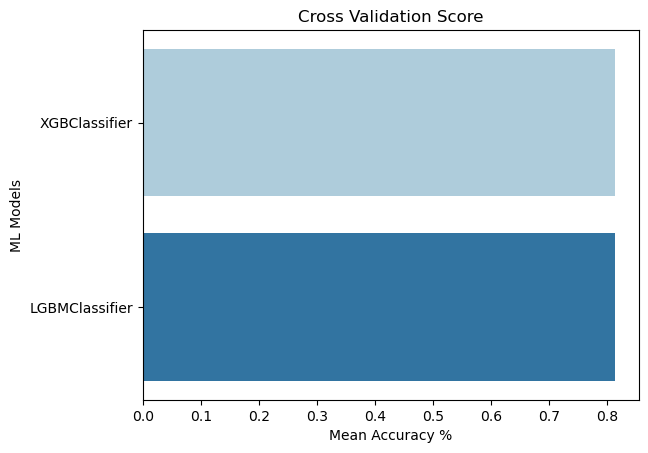

In [152]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["XGBClassifier",
            "LGBMClassifier"]})
sns.barplot(x= 'Cross Validation Means', y = 'ML Models', data=cv_results,palette="Paired")
plt.xlabel('Mean Accuracy %')
plt.title('Cross Validation Score');

In [153]:
cv_results.sort_values("Cross Validation Means", axis = 0, ascending = False)

,Cross Validation Means,ML Models
1,0.814207,LGBMClassifier
0,0.813201,XGBClassifier


<a id = "12"></a><br>
## Ensemble Modeling 

In [155]:
votingC = VotingClassifier(estimators = [
                                        ("xgb",best_estimators[0]),
                                        ("lgbm",best_estimators[1])
                                        ],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

[02:05:59] WARNING: ../src/learner.cc:627: 
Parameters: { "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.7975848188614146


<a id = "13"></a><br>
## Prediction and Submission

In [156]:
test_transported = pd.Series(votingC.predict(test), name = "Transported").astype('bool')
results = pd.concat([test_passengerıd, test_transported],axis = 1)
results

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [158]:
results.to_csv("spaceship5.csv", index = False)